# Deep Learning from Scratch 

## 퍼셉트론 구현 

In [3]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0 
    elif tmp > theta:
        return 1

In [4]:
outcome = AND(1, 0)
print("The outcome is: {}".format(outcome))

The outcome is: 0


In [9]:
outcome = AND(1, 1)
print("The outcome is: {}".format(outcome))

The outcome is: 1


## 가중치와 편향도입

In [6]:
import numpy as np 

x = np.array([0, 1])  #입력
w = np.array([0.5, 0.5])  #가중치
b = -0.7  #편향

In [7]:
w-x

array([0. , 0.5])

In [10]:
np.sum(w*x)

0.5

In [13]:
round(np.sum(w*x) + b, 2)

-0.2

In [15]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0 
    else:
        return 1

In [16]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0 
    else:
        return 1

In [19]:
OR(0,0)

0

## 퍼셉트론  Operator

In [127]:
class Perceptron:  #  퍼셉트론
	def __init__(self, x1,x2):  # Initialization
		self.x1=x1
		self.x2=x2
		self.w1=0.5
		self.w2=1-self.w1
		b=-0.7
	
			
		
	def Pand(self):  #AND Operator                 
		x=np.array([self.x1,self.x2])
		w=np.array([self.w1,self.w2])
		tmp=np.sum(w*x)+b
		if tmp<=0:
			return 0
		else:
			return 1


	def Pnand(self):  #NAND Operator
		x=np.array([self.x1,self.x2])
		w=np.array([-self.w1,-self.w2])
		tmp=np.sum(w*x)-b
		if tmp<=0:
			return 0
		else:
			return 1

	def Por(self):  #OR Operator
		x=np.array([self.x1,self.x2])
		w=np.array([self.w1,self.w2])
		nb=b+self.w1
		tmp=np.sum(w*x)+nb
		if tmp<=0:
			return 0
		else:
			return 1

	def Pxor(self):  #XOR Operator
		op=Perceptron(self.x1,self.x2)
		tmp1=op.Pnand()
		tmp2=op.Por()
		x1=tmp1
		x2=tmp2
		opq=Perceptron(x1,x2)
		return opq.Pand()
	
	def act_func(self):  #activation Function : 활성화함수
		x=np.array([self.x1,self.x2])
		w=np.array([self.w1,self.w2])
		dep_var=b+np.sum(w*x)
		if dep_var<=0: 
			return 0
		else: 
			return 1

In [128]:
m=Perceptron (1,1)
print(m.Pand(), m.Pnand(), m.Por(),m.Pxor())
print(m.act_func())

1 0 1 0
1


## 계단함수의 그래프

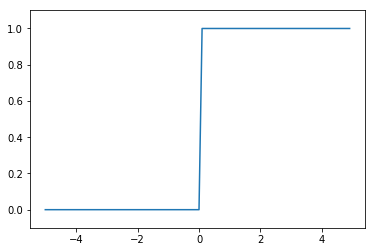

In [130]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)  #y축의 범위지정
plt.show()

## 시그모이드 함수

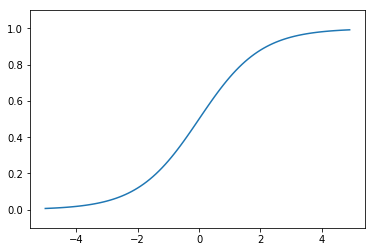

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
     return 1/(1+np.exp(-x))
x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

## ReLU 함수

In [ ]:
def ReLu(x):
    return np.maximum(0,x)
x=np.arange(-5.0,5.0,0.1)
y=ReLu(x)
plt.plot(x,y)
plt.xlim(-6.0,6.0)
plt.ylim(-0.1,5.3)
plt.show()
b= np.array([[1,2,3],[3,4,3],[5,6,3],[5,6,7]])
b
np.ndim(b)
# np.shape(b)
# c=np.transpose(b)
# np.ndim(c)

In [1]:
a = np.zeros((4,5,3)) #4 of 5x3 matrix 
a.shape
# np.ndim(a)

NameError: name 'np' is not defined

In [2]:
a

NameError: name 'a' is not defined

In [211]:
a.reshape(2,6,5)

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [3]:
b=[1]
np.ndim(b)

NameError: name 'np' is not defined

In [5]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return 1/(1+exp(-x)) * (1 - 1/(1+exp(-x)))

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in xrange(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")
    print (neural_network.think(array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


NameError: name 'xrange' is not defined